In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trp
import sys
from PIL import Image

In [2]:
image_BGR = cv2.imread('Rhein.jpeg')
img = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
arr = np.array(grey)



x_vals = np.linspace(0,255,500)
y_vals = np.linspace(255,0,500)

In [3]:

def plot_results(input_img, output_img, x_values, y_values):

    
    plt.figure(figsize = (36,12))
    # the input image is shown left
    plt.subplot(131)
    plt.imshow(input_img,cmap='gray', vmin=0, vmax=255)
    plt.title('Input Image')
    plt.axis('off')

    # plotting the pixelmapping graph
    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixel Intensity')
    plt.ylabel('Output Pixel Intensity')
    plt.grid(True)

    #the output image is shown right
    plt.subplot(133)
    plt.imshow(output_img,cmap='gray', vmin=0, vmax=255)
    plt.title('Transformed Image')
    plt.axis('off')


## Histogram

In [4]:
def plot_histogram(picture_array):
    # Calculate image statistics
    print("Total number of pixels:", picture_array.size)
    print("Image dimensions:", picture_array.shape)
    # Storage calculation: N * M * log_2(F)
    print("Storage usage (KB):", (picture_array.shape[0] * picture_array.shape[1] * np.log2(256))/8/1024)
    
    # Create histogram using numpy's histogram function
    plt.hist(picture_array.ravel(), bins=256, range=(0, 255))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

Total number of pixels: 1712000
Image dimensions: (1070, 1600)
Storage usage (KB): 1671.875


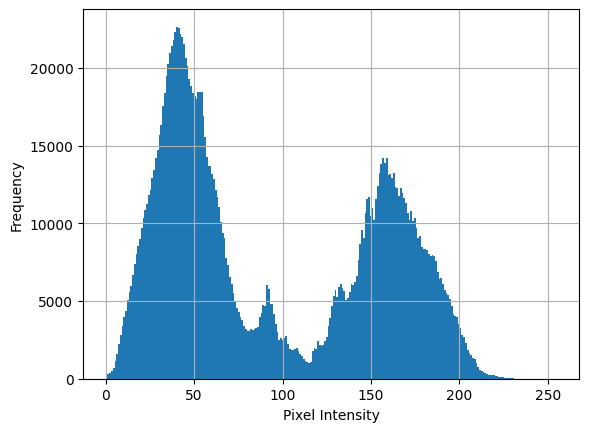

In [5]:
# unchanged histogram
plot_histogram(grey)

## Bild

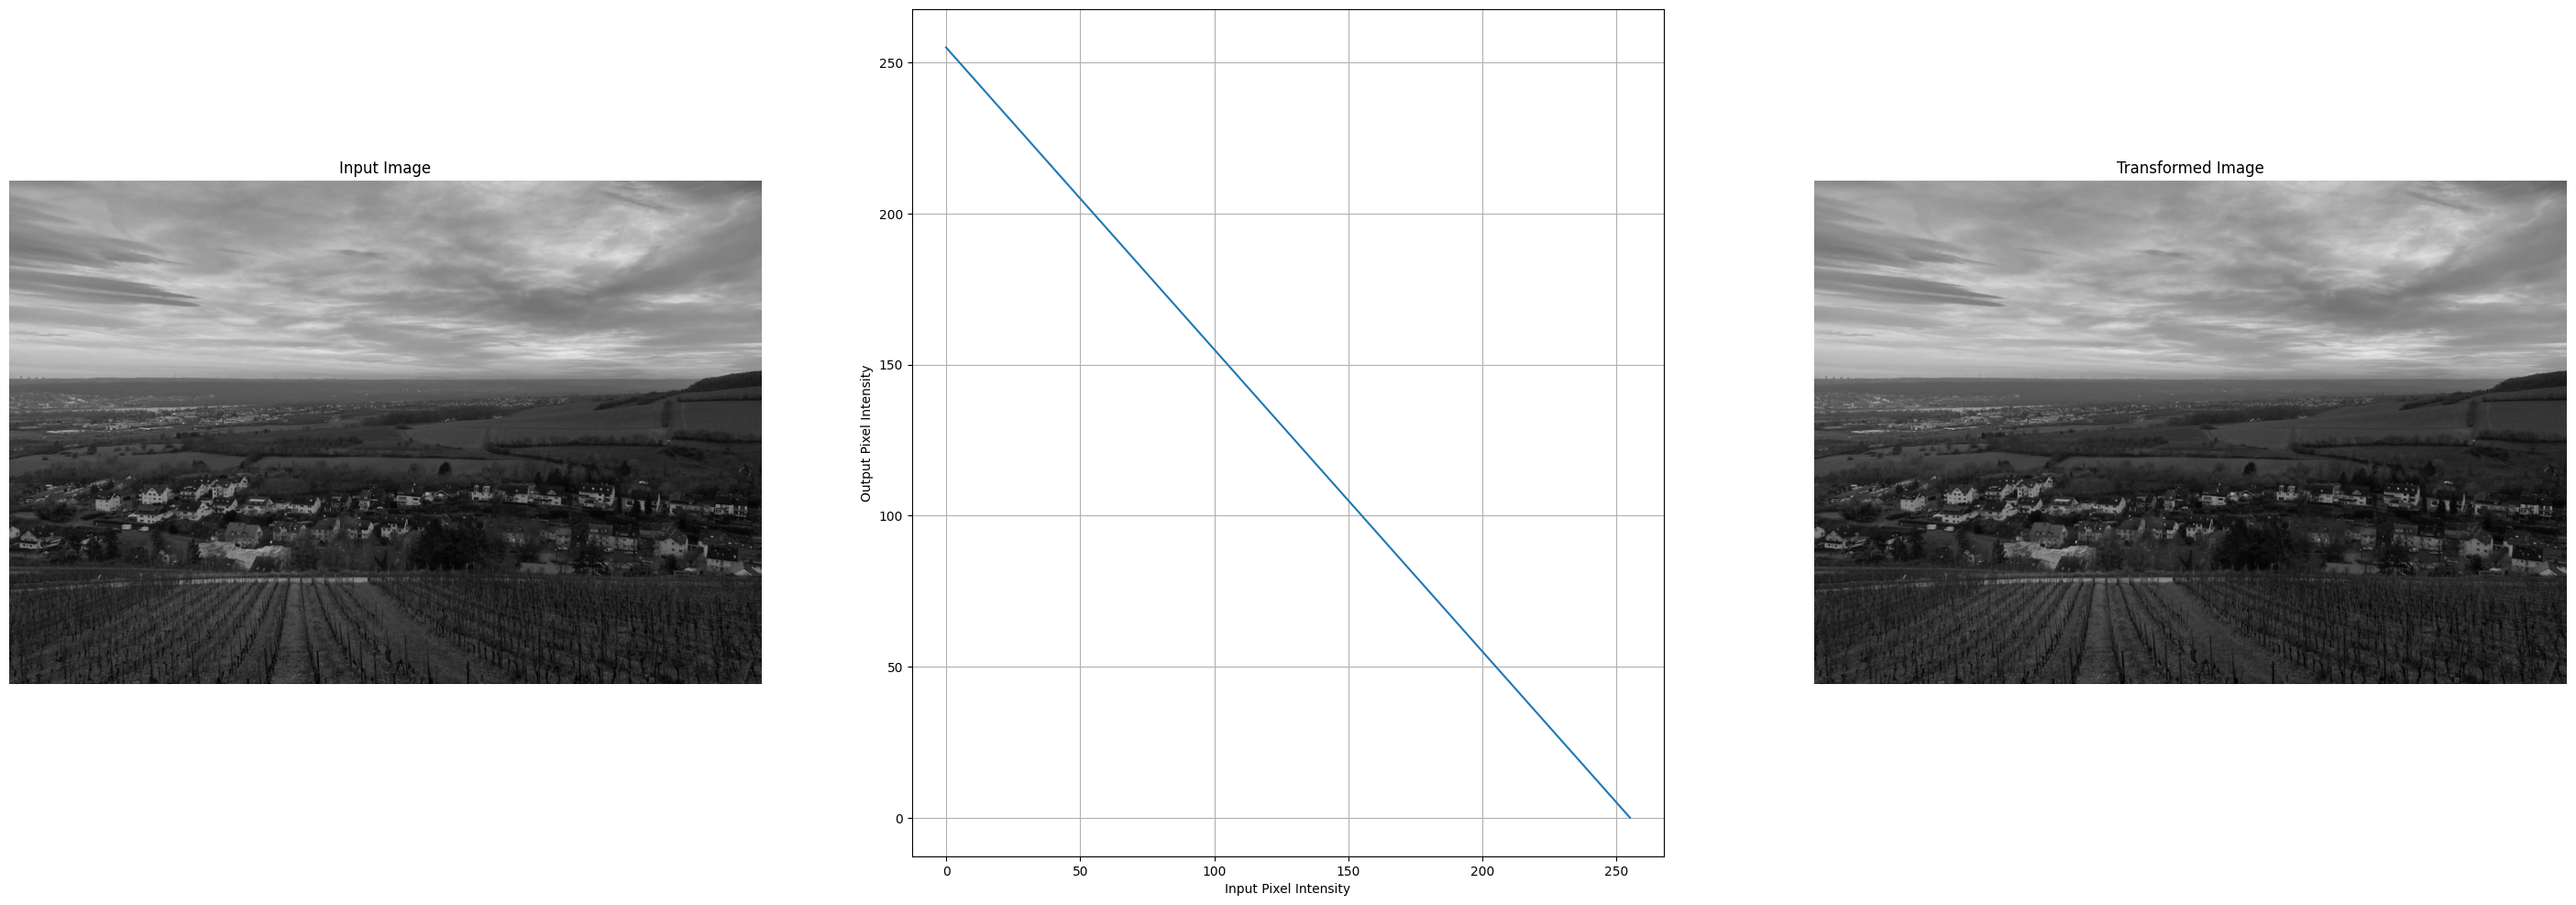

In [8]:
plot_results(np.array(grey),np.array(grey),y_vals, x_vals)

## Bildnegativ

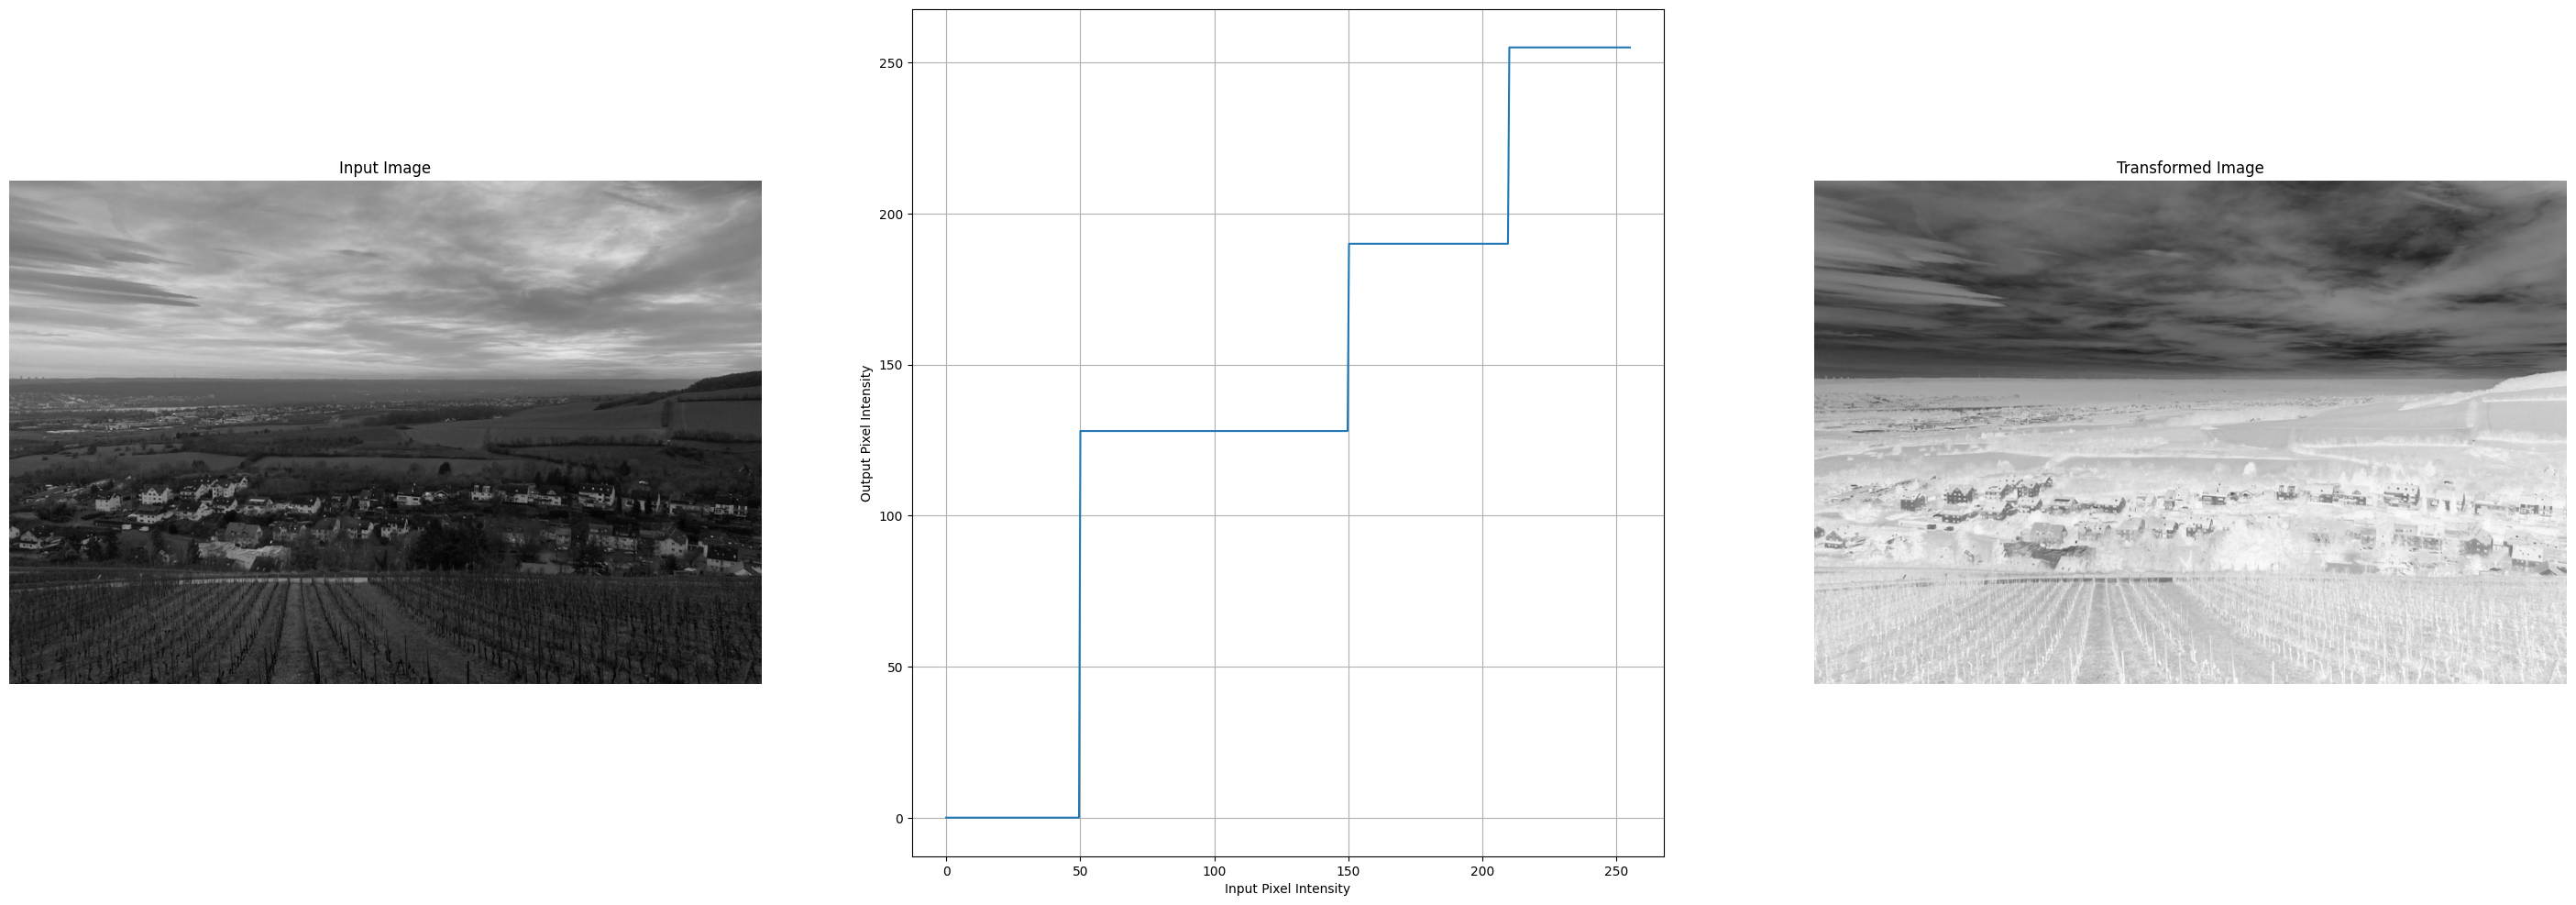

In [14]:
arr = np.array(grey)
negative = 255 - arr

plot_results(grey, negative, x_vals, y_vals)

## Negativ eines Farbbildes

In [14]:
color_arr = np.array(img)
negative_color = 255 - color_arr
negative_color_image = Image.fromarray(negative_color)
negative_color_image.show()

## Binarisierung

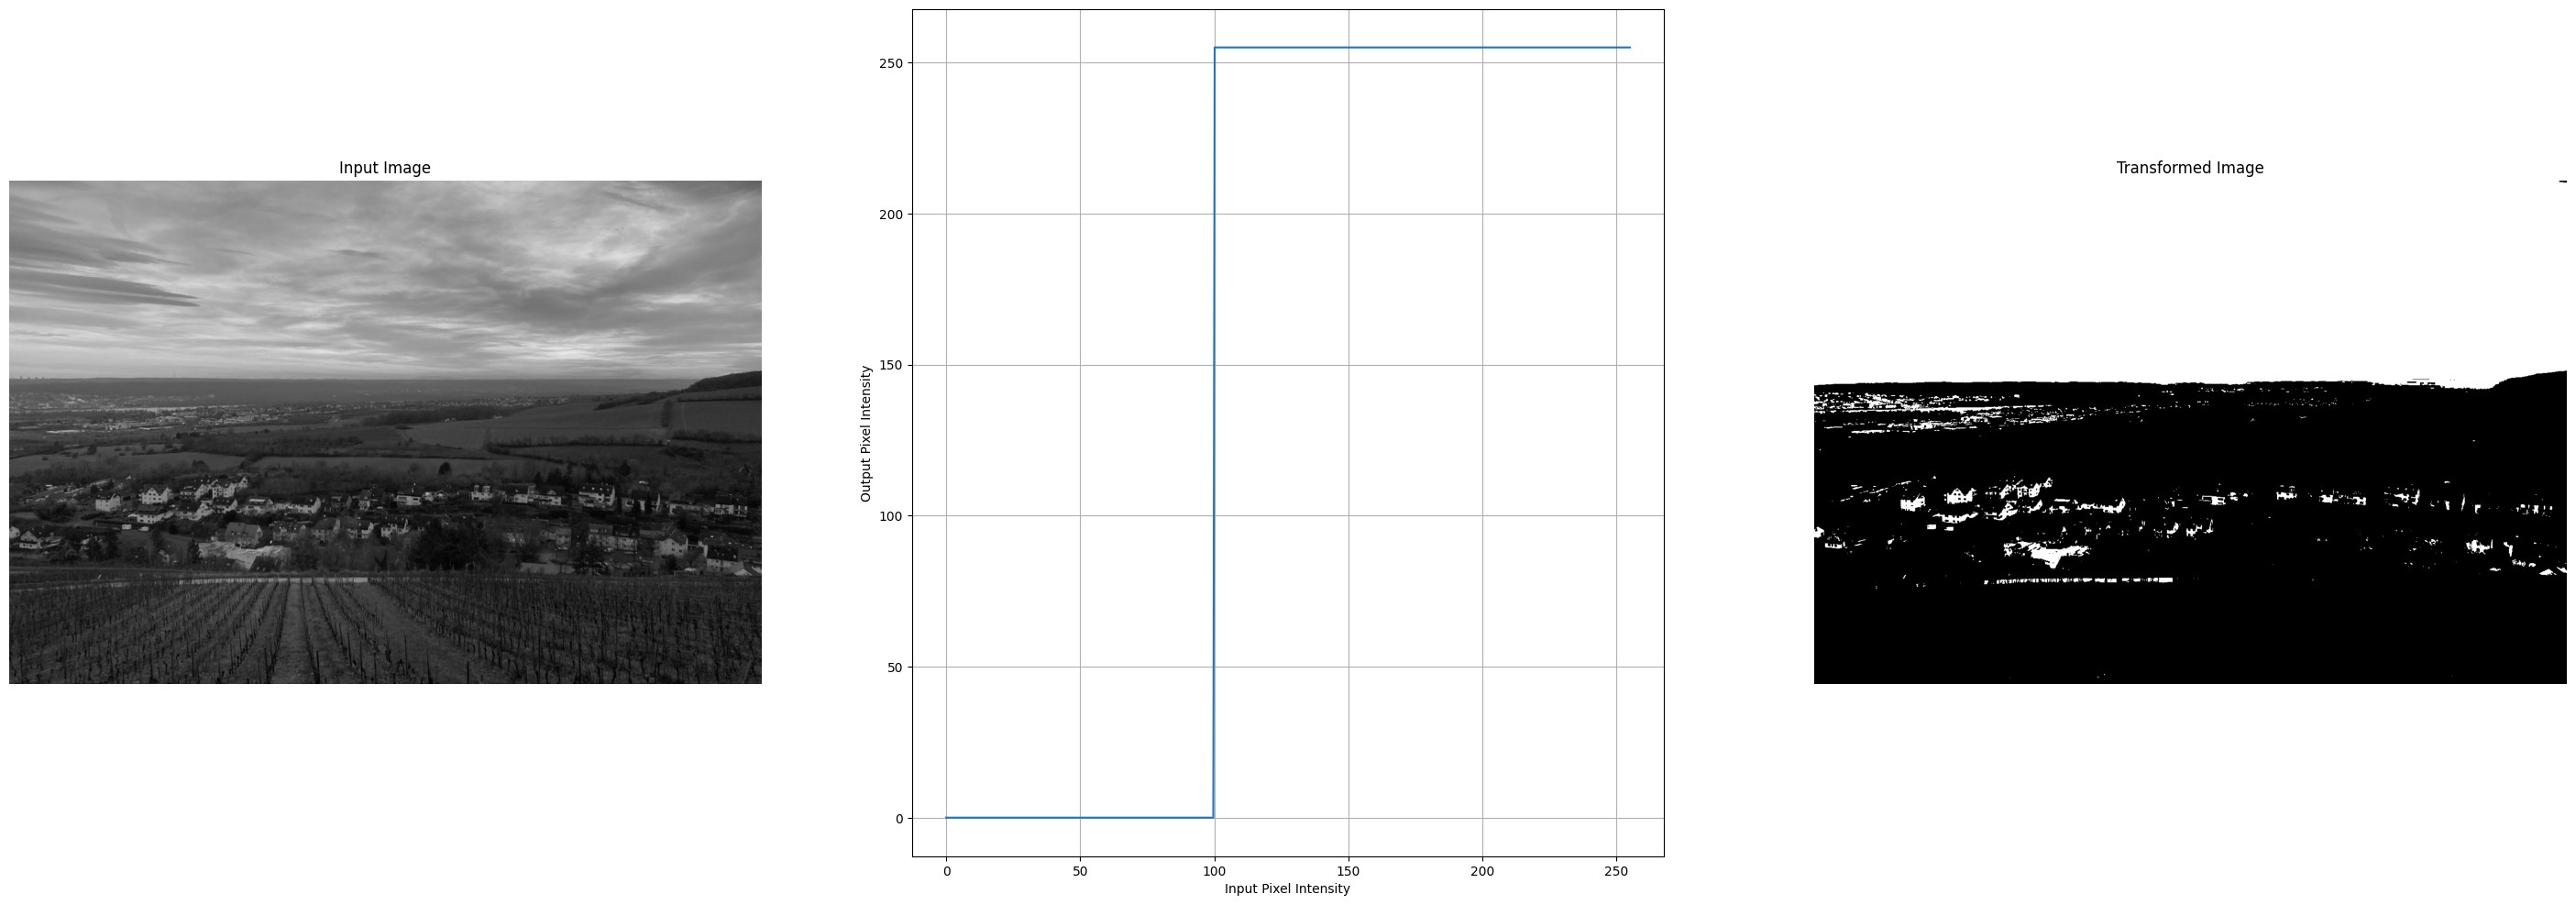

In [9]:
threshold = 100

def binarisation(val, threshold):
    return np.where(val >= threshold, 255, 0)

binary = np.where(grey >= threshold, 255, 0)

y_vals = binarisation(x_vals, threshold)

plot_results(grey, binary, x_vals, y_vals)

### Quantisierung

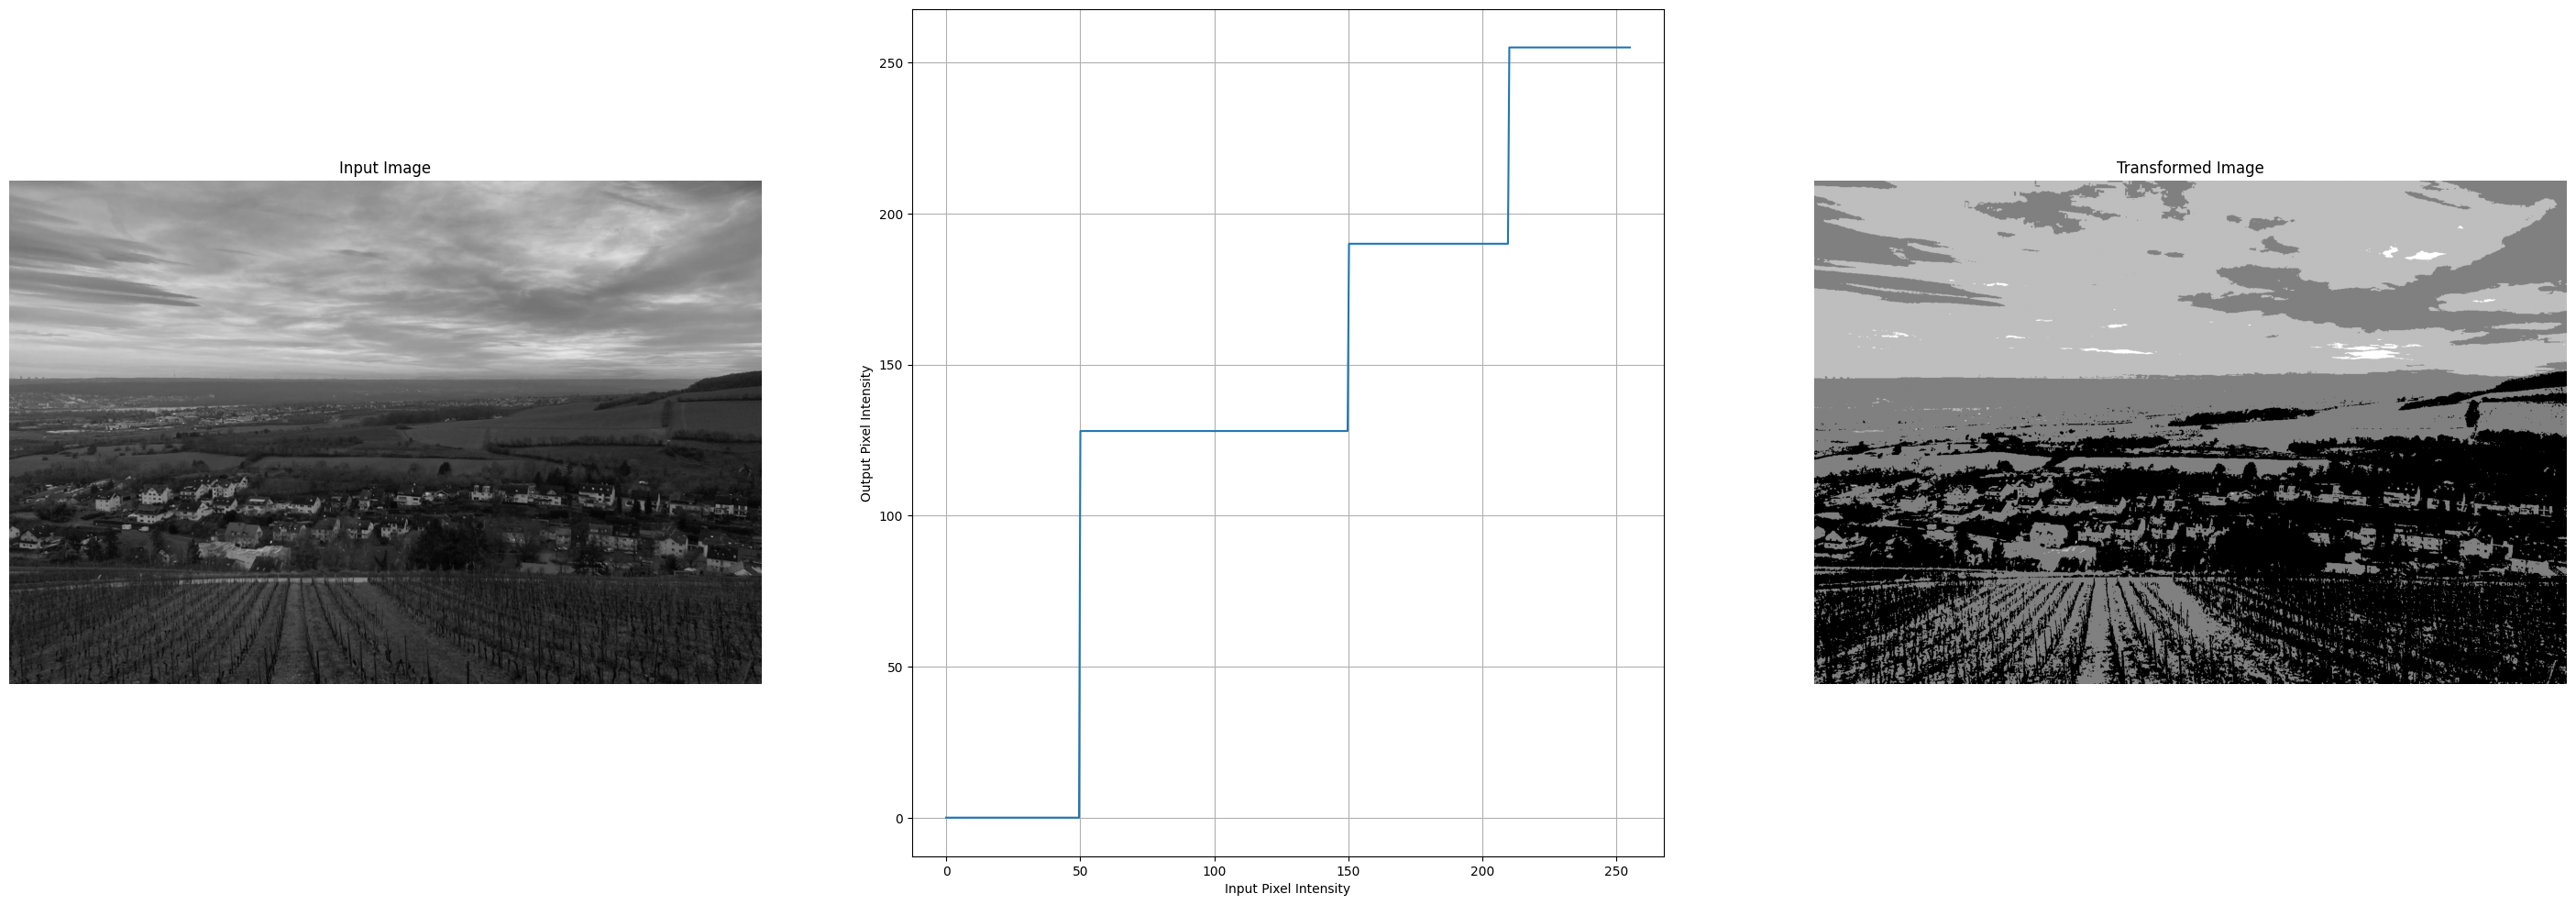

In [11]:
threshold_1 = 50
threshold_2 = 150
threshold_3 = 210

def quantisation(vals, th1, th2, th3):
    return np.where(vals < th1, 0, np.where((vals >= th1) & (vals < th2), 128, np.where((vals >= th2) & (vals < th3), 190,255)))
    
y_vals = quantisation(x_vals,threshold_1, threshold_2,threshold_3)    
quant = quantisation(grey,threshold_1,threshold_2,threshold_3)

plot_results(grey, quant, x_vals,y_vals)

## Bit-Ebenen Fensterung

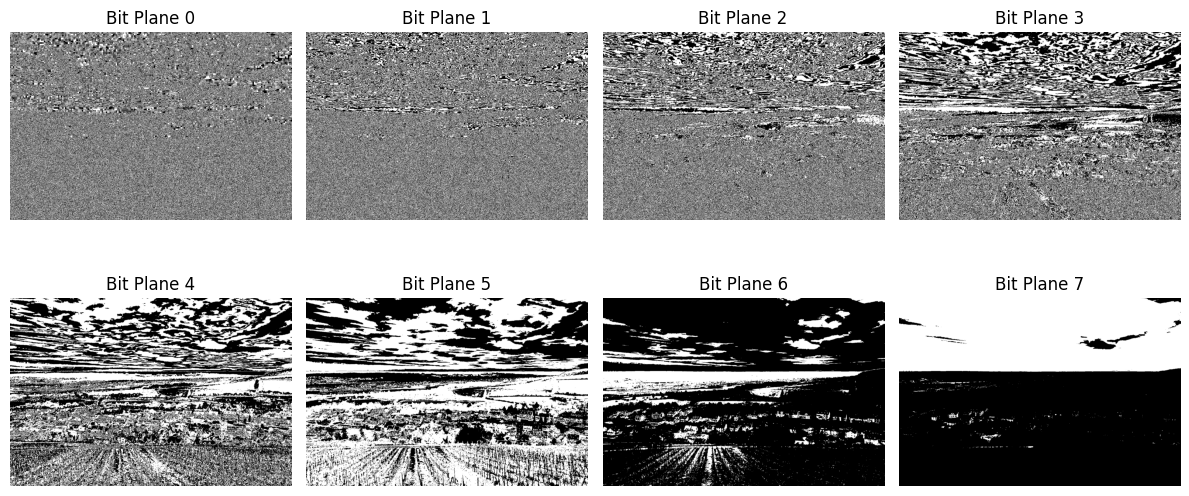

In [16]:
image = Image.open('Rhein.jpeg').convert('L')
image_array = np.array(image)

def extract_bit_plane(image_array, bit):
    return ((image_array >> bit)&1) * 255 


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(8):
    bit_plane = extract_bit_plane(image_array, i)
    ax = axes[i // 4, i % 4]
    ax.imshow(bit_plane, cmap='gray')
    ax.set_title(f'Bit Plane {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Grauwert-Fensterung

#### Binarisierung

## window_start = 150
window_end = 200

def bin_windowing(array, window_start, window_end):
    return np.where(array < window_start, 0, np.where(array <= window_end, 255, 0 ))

bin_win = bin_windowing(grey, window_start, window_end)
y_vals = bin_windowing(x_vals, window_start, window_end)

plot_results(grey, bin_win, x_vals,y_vals)

#### Intensitätsanhebung

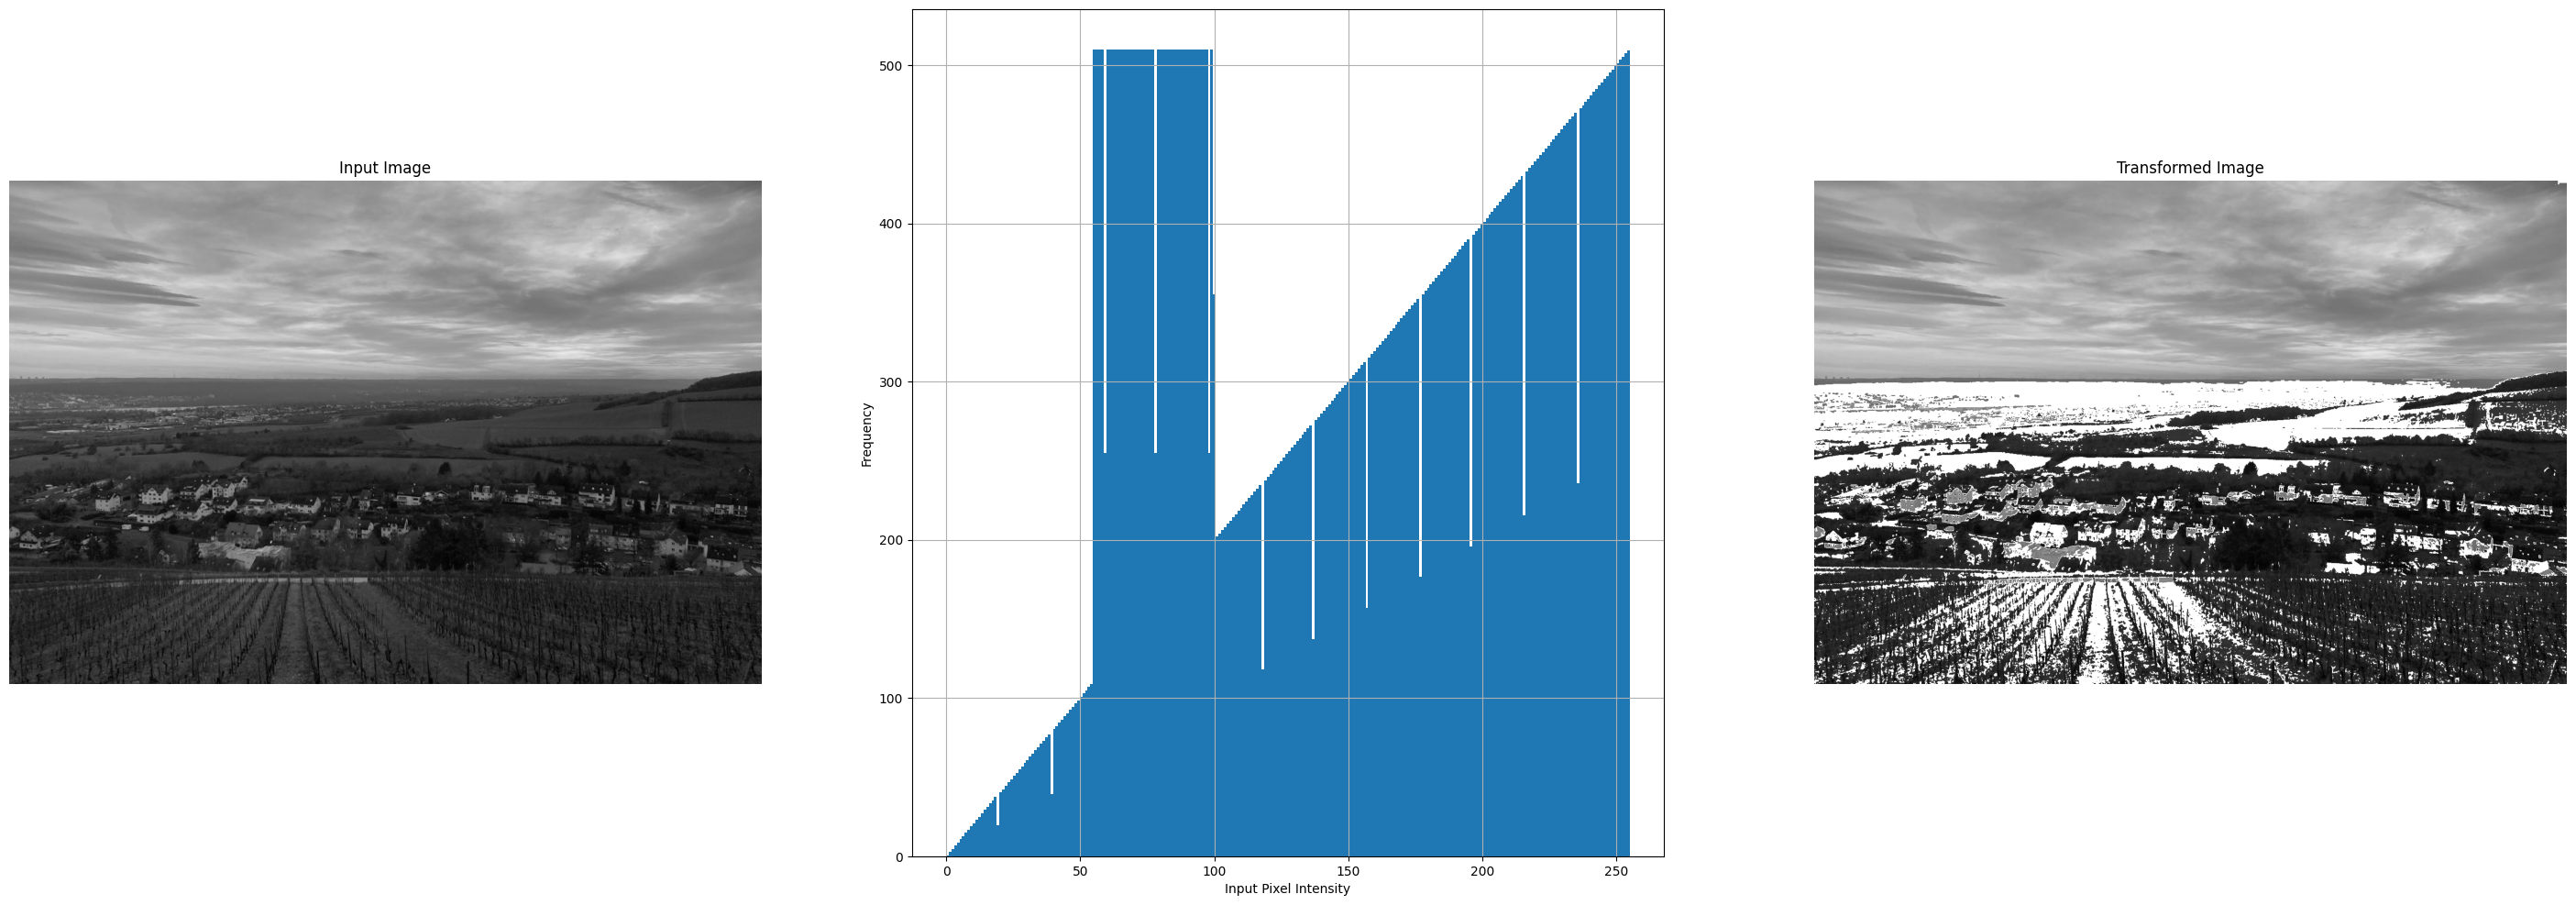

In [32]:
window_start = 55
window_end = 100

def bin_windowing(array, window_start, window_end):
    return np.where(array < window_start, array, np.where(array <= window_end, 255, array ))

bin_win = bin_windowing(grey, window_start, window_end)
y_vals = bin_windowing(x_vals, window_start, window_end)

plot_results(grey, bin_win, x_vals,y_vals)

## Helligkeit

Funktioniert nicht ganz

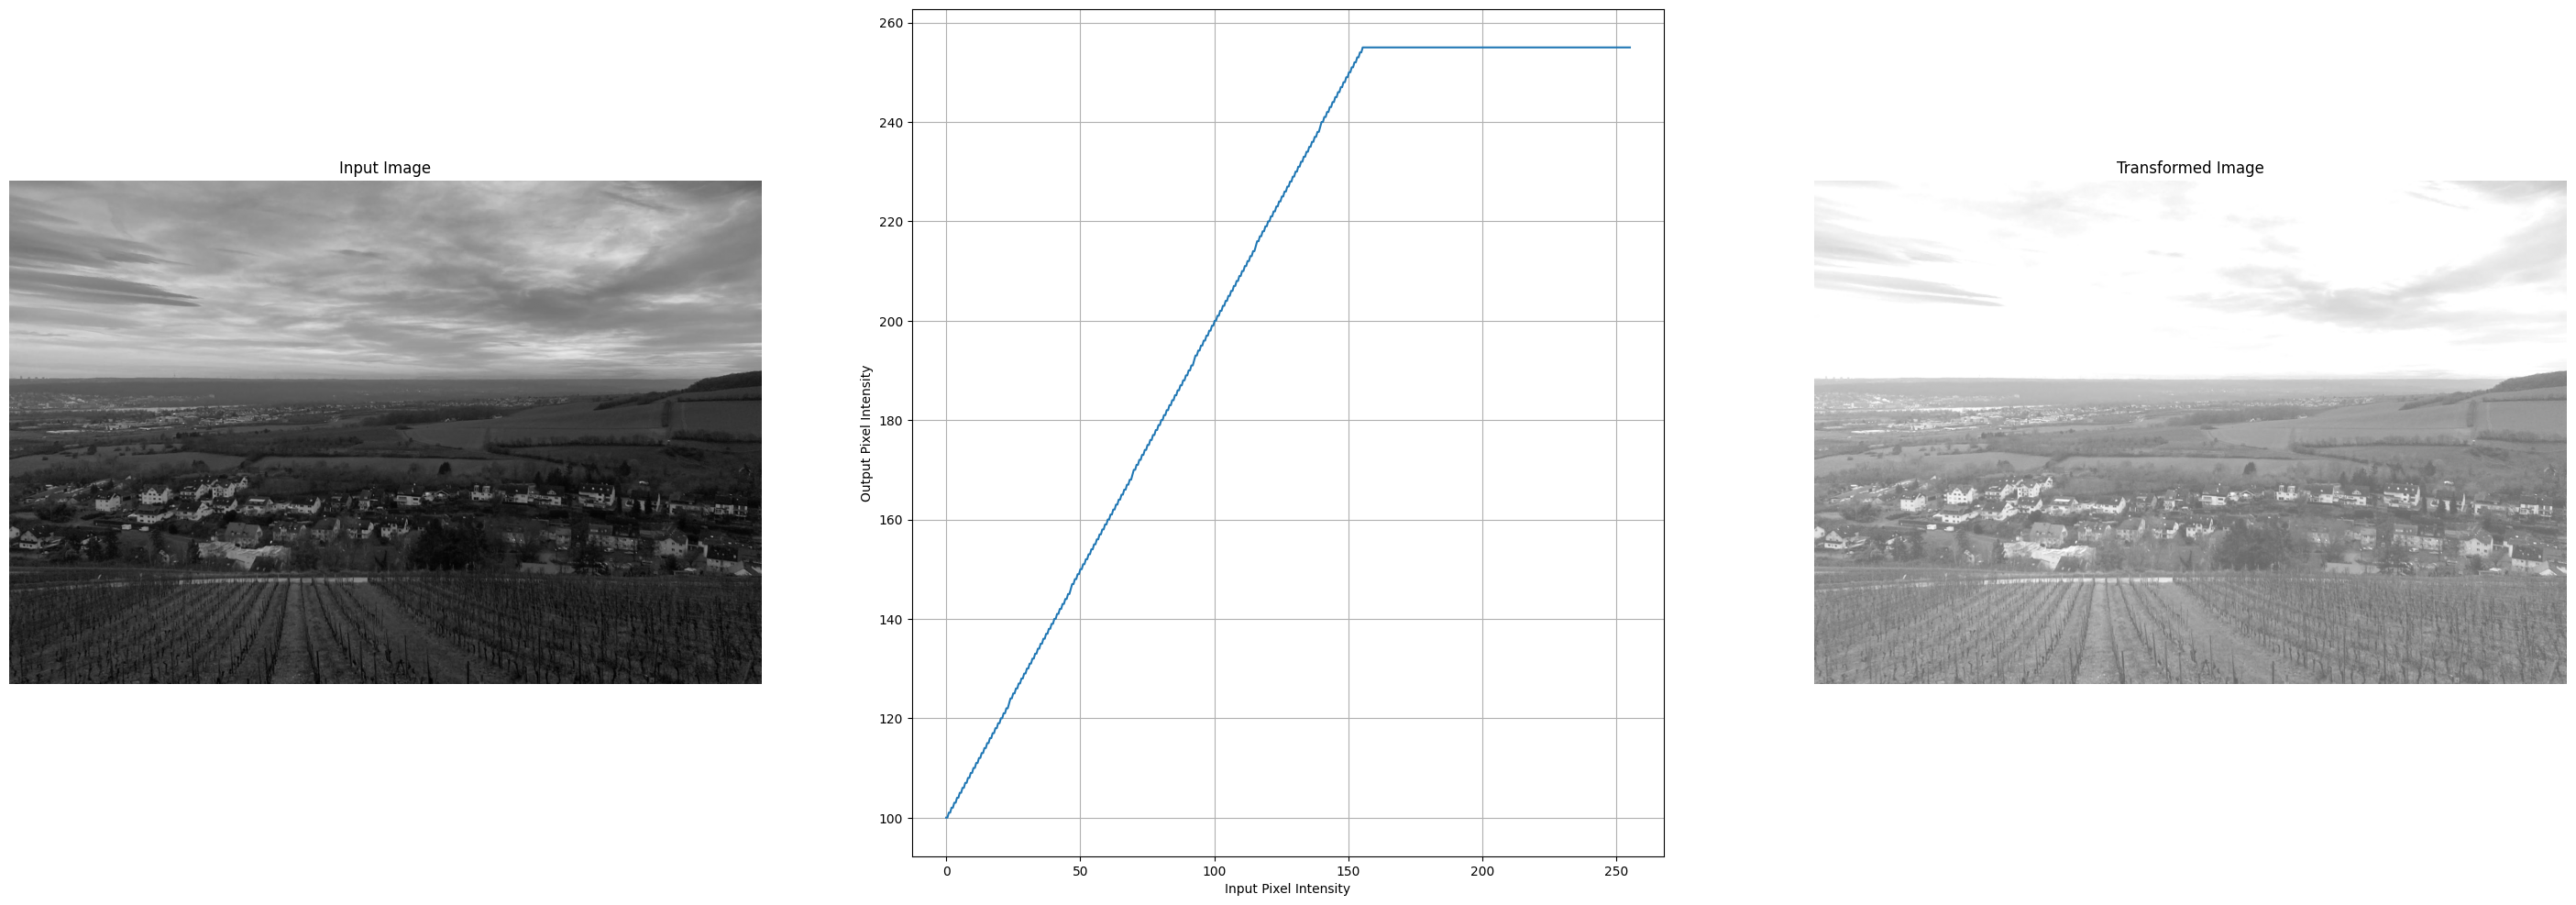

In [21]:
bright_val = 100

def brightness(array, bright_val):
    brightened_image = array.astype(np.int32) + bright_val
    return np.where(brightened_image < 0,0,np.where(brightened_image > 255,255,brightened_image))


y_vals = brightness(x_vals, bright_val)
plot_results(grey, brightness(grey, bright_val), x_vals, y_vals)

## Kontraststauchung und Kontrastspreizung

#### Kontraststauchung

(1070, 1600)
Anzahl Pixel im Bild 1712000
Höhe und breite des Bildes (1070, 1600)
Speicherverbrauch :  1671.875
<class 'numpy.ndarray'> (1070, 1600)


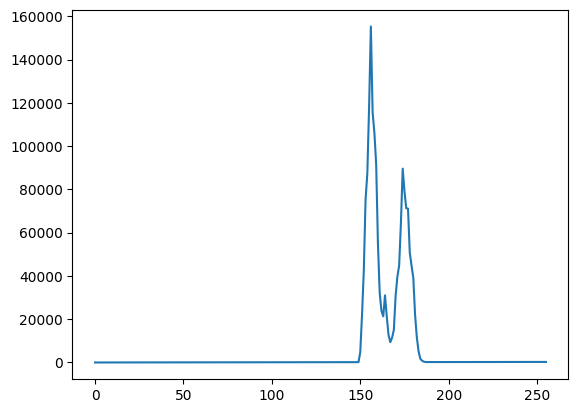

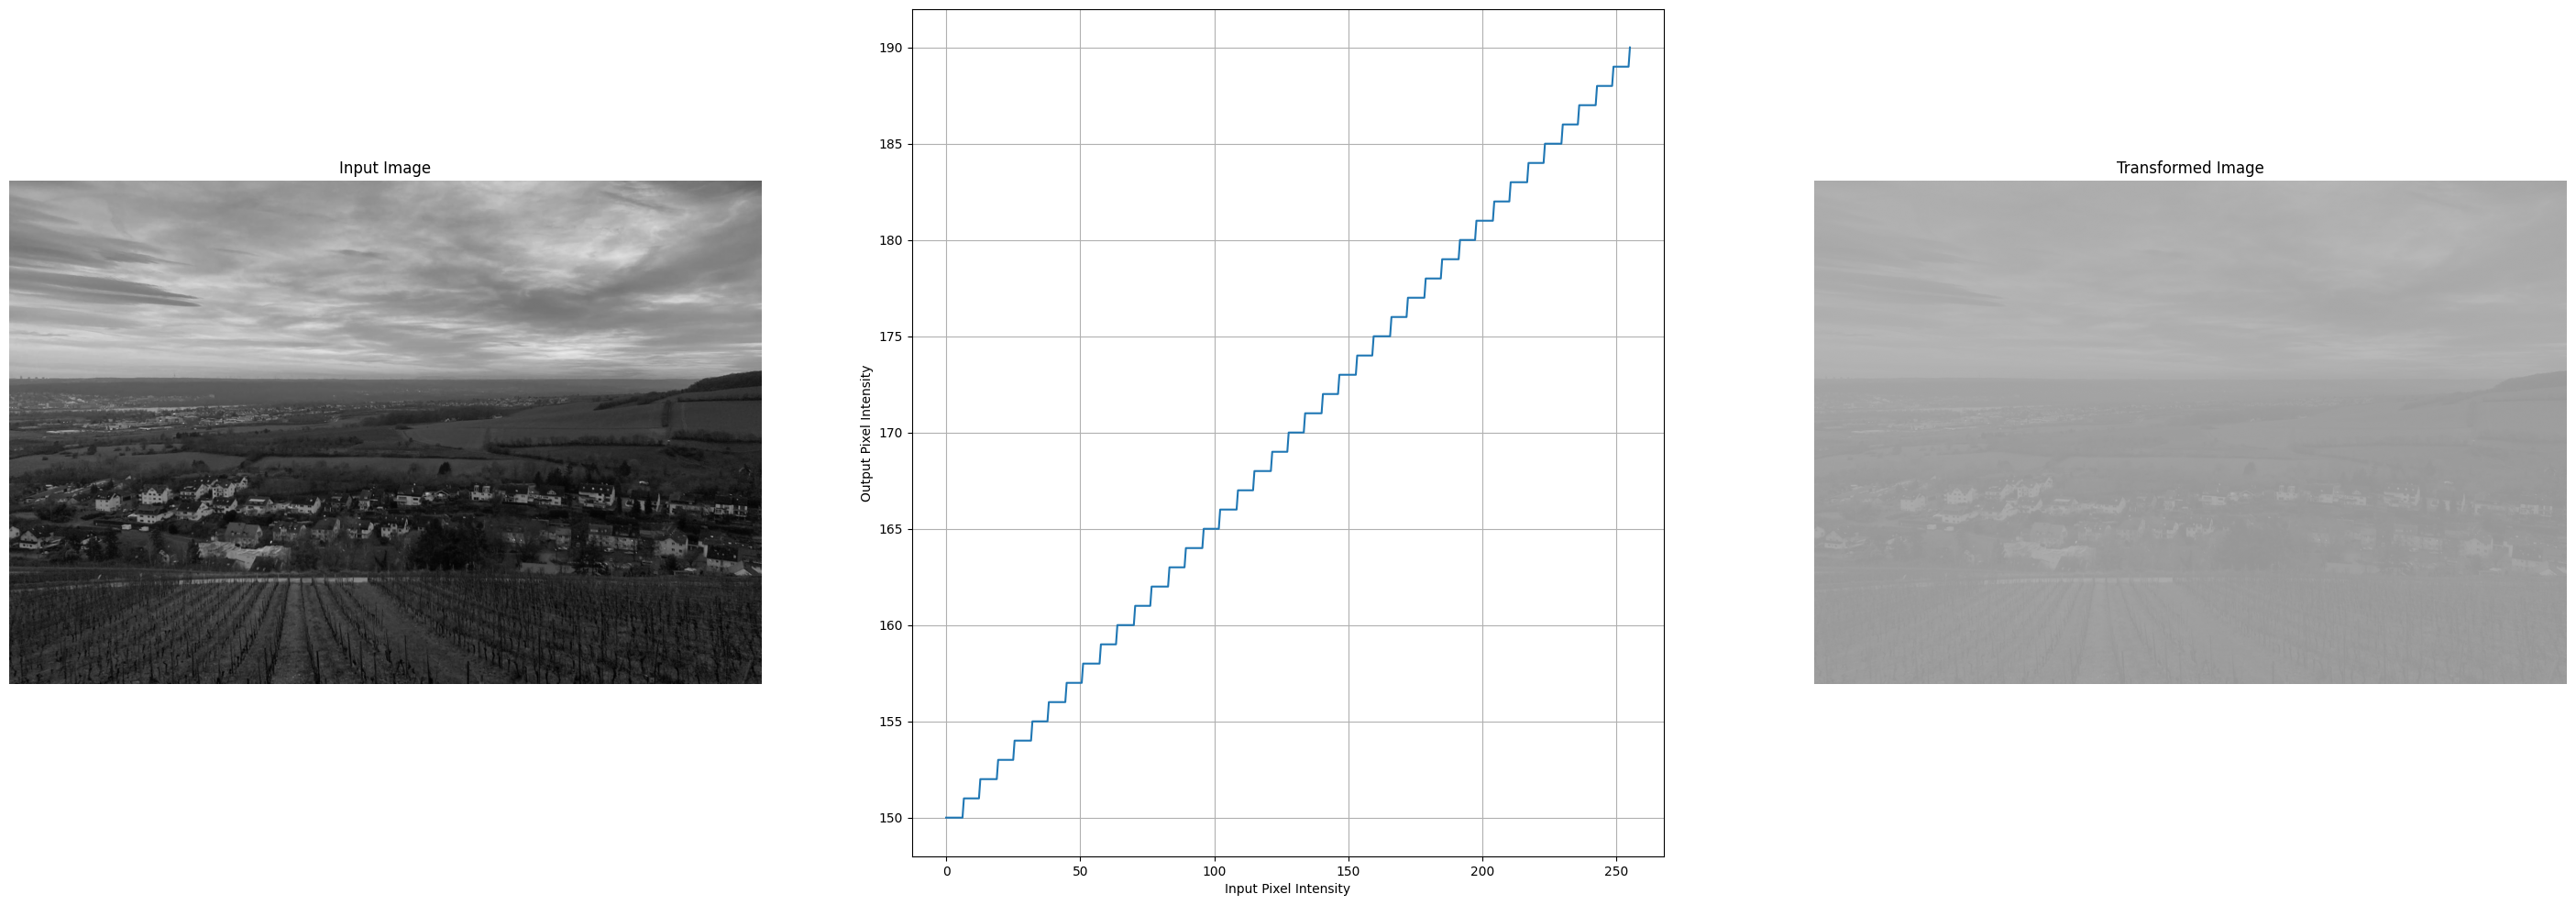

In [24]:
thresh_0 = 150
thresh_255 = 190

def konstraststauchung(picture,th0,th255):
    I_max = np.max(picture)
    I_min = np.min(picture)
    return np.array((picture - I_min) / (I_max - I_min) * (th255 - th0) + th0).astype(int)

y_vals = konstraststauchung(x_vals,thresh_0,thresh_255)
gestaucht = konstraststauchung(grey,thresh_0,thresh_255)
print(gestaucht.shape)
plot_histogram(gestaucht)

#plt.hist(gestaucht.flatten())

plot_results(grey, konstraststauchung(grey,thresh_0,thresh_255), x_vals,y_vals)
print(type(gestaucht), gestaucht.shape)
#image = Image.fromarray(gestaucht)
#image.show()

#### Kontrastspreizung

Anzahl Pixel im Bild 1712000
Höhe und breite des Bildes (1070, 1600)
Speicherverbrauch :  1671.875


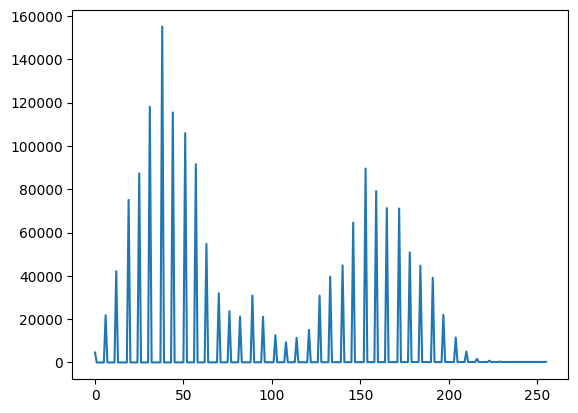

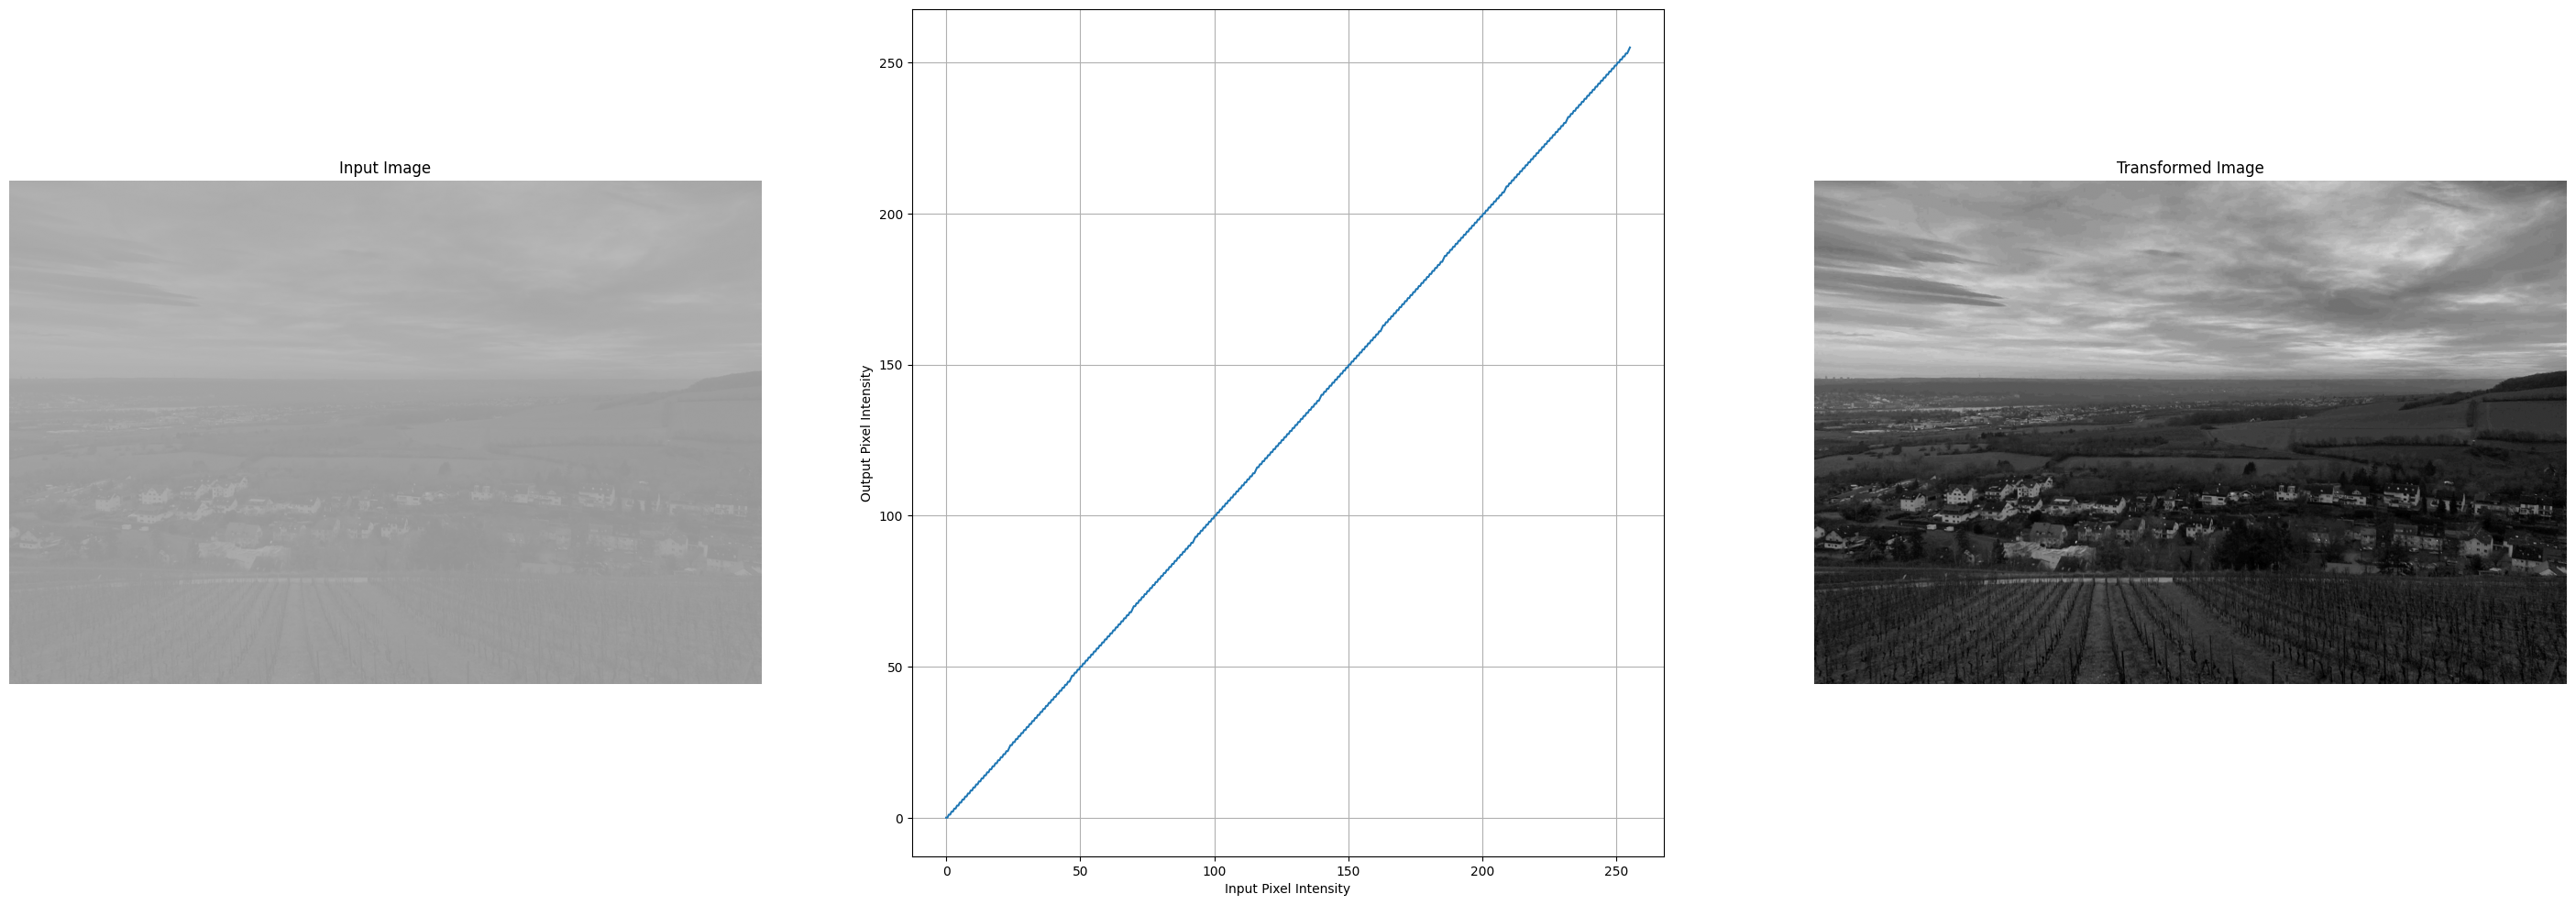

In [26]:
th_low = 0
th_high = 255
y_vals = konstraststauchung(x_vals,th_low,th_high)
gespreizt = konstraststauchung(gestaucht,th_low,th_high)
plot_histogram(gespreizt)


plot_results(gestaucht, gespreizt, x_vals,y_vals)


## Histogrammausgleich


Anzahl Pixel im Bild 12000000
Höhe und breite des Bildes (4000, 3000)
Speicherverbrauch :  11718.75


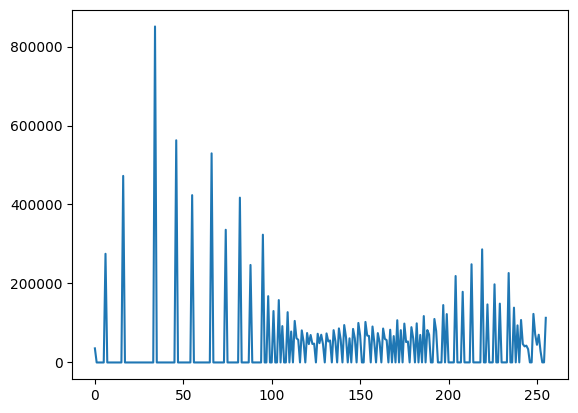

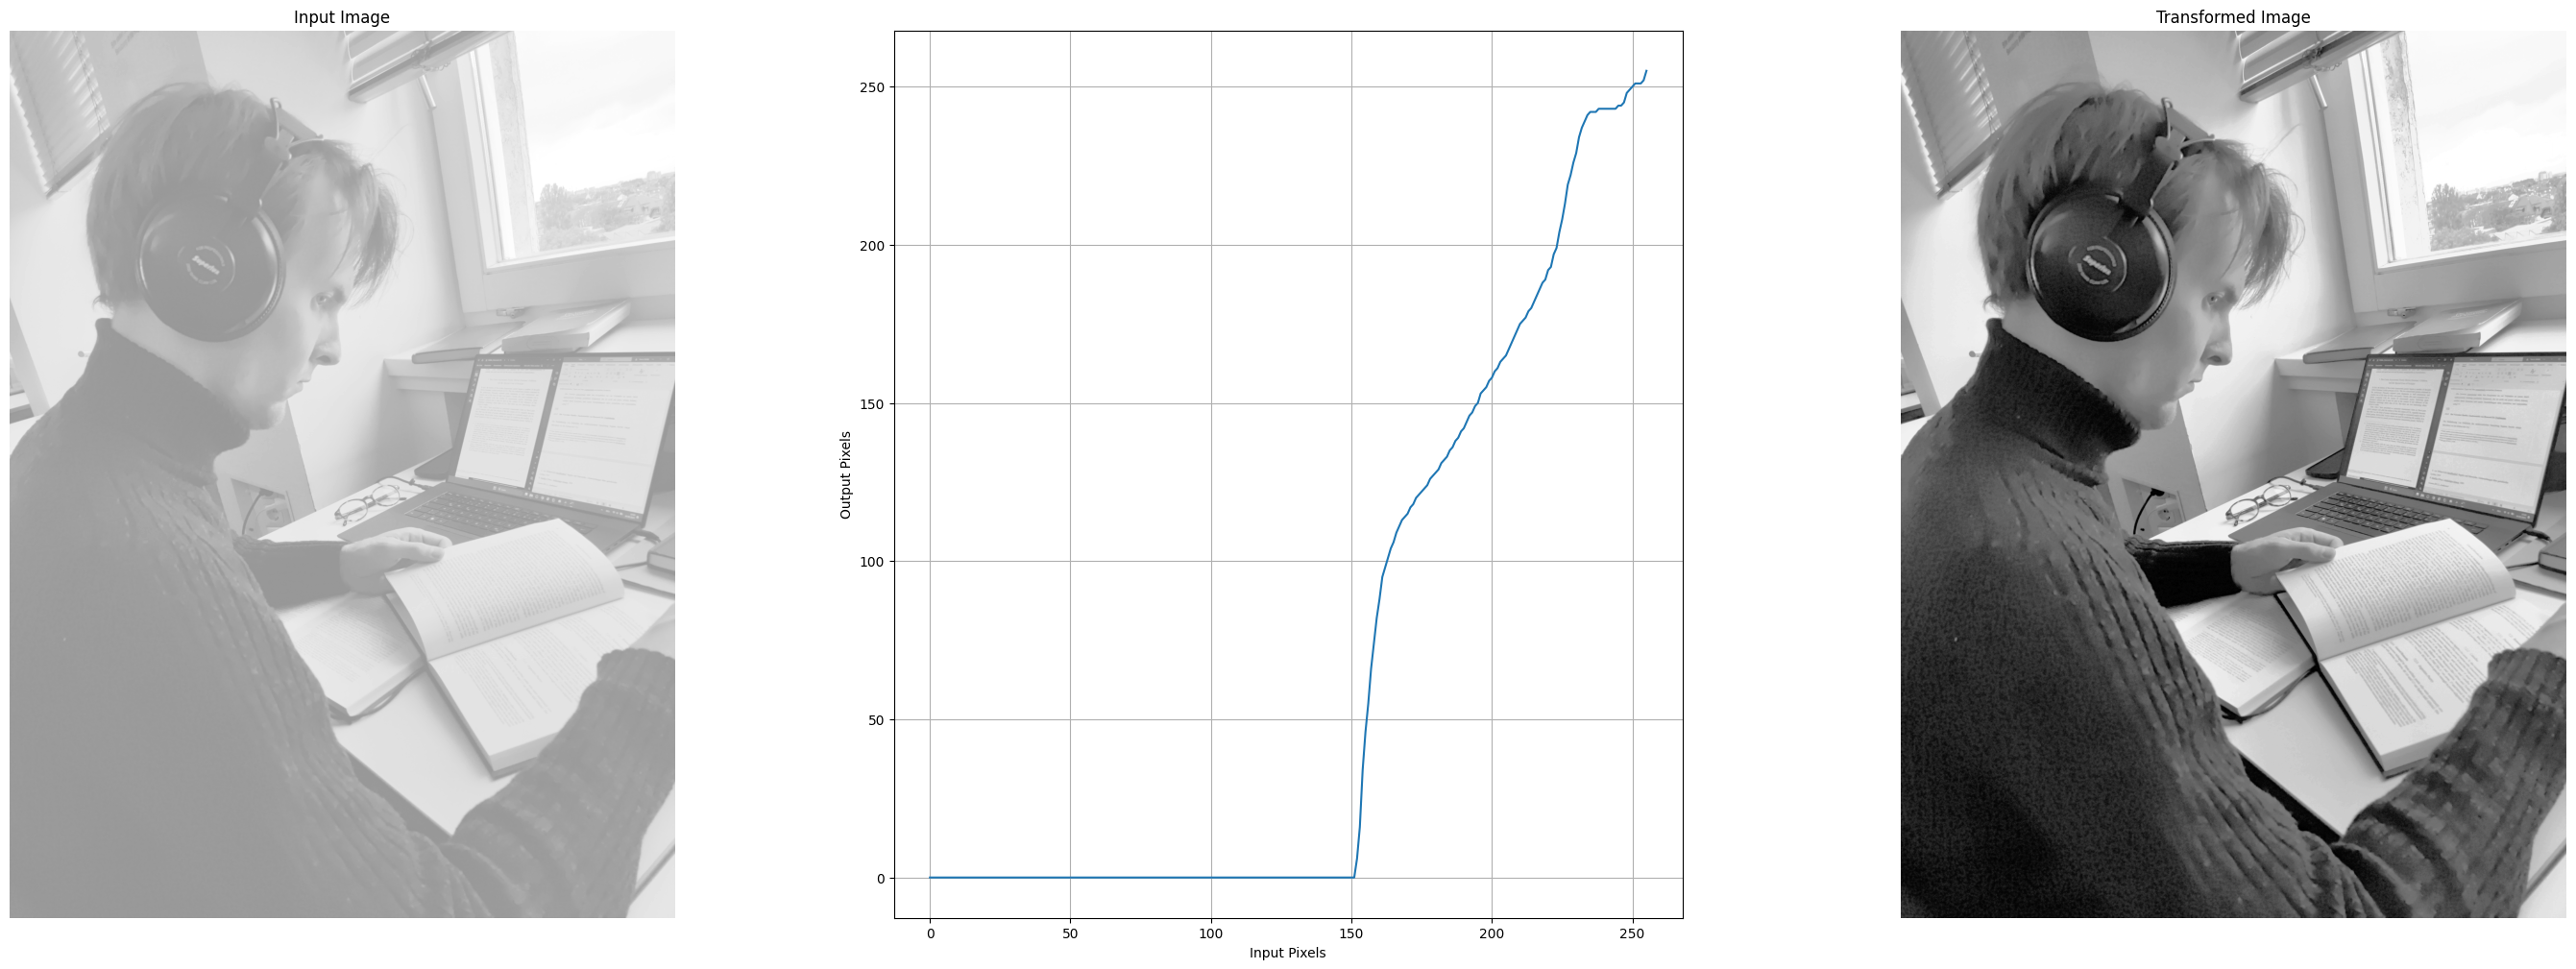

In [8]:
input_picture = gestaucht

hista, bins = np.histogram(input_picture.flatten(), bins=256, range=[0, 256])
norm_histo = hista/input_picture.size
# Kumolative Summe auf das normierte Histogramm für die cdf
cdf = norm_histo.cumsum()
# CDF jetzt auf den bereich 0-255 spreizen
norm_cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
# integer umwandlung
norm_cdf = norm_cdf.astype('uint8')
equalized = norm_cdf[input_picture]
# berechnung der y werte mit 'neuen' x-werten
y_vals = norm_cdf[np.arange(256)]


plot_histogram(equalized)
plot_results(input_picture, equalized, np.arange(256), y_vals)


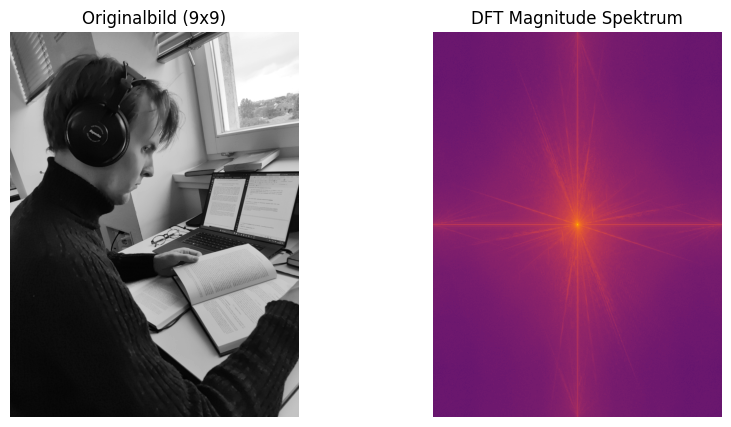

In [214]:
def bild_gen(n,m,modul):
    bild = np.array([[255 if pixel % modul == 0 else 0 for pixel in range(m) ] for n in range(n)])
    return bild



# DFT auf das Bild anwenden
f_transform = np.fft.fft2(grey)
f_transform_shifted = np.fft.fftshift(f_transform)

# Magnitude Spektrum berechnen
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Bild und Frequenzspektrum anzeigen
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grey, cmap='gray')
plt.title('Originalbild (9x9)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='inferno')
plt.title('DFT Magnitude Spektrum')
plt.axis('off')

plt.show()